In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the CSV file
file_path = "data/image_and_plot_mentions_fequency.csv"  # Replace with the actual file path
data = pd.read_csv(file_path, sep=';', names=["movie", "total_count", "male_count", "female_count",'1','2','3','4','5'])

data = data[data['total_count'] > 0]


In [4]:
# Calculate total male and female_counts
total_male_names = data['male_count'].sum()
total_female_names = data['female_count'].sum()

print(f"\nTotal Male Names: {total_male_names}")
print(f"Total Female Names: {total_female_names}")


Total Male Names: 5618.0
Total Female Names: 2138.0


In [5]:
# Add a column for gender ratio (male/female)
data['Male-Female Ratio'] = data['male_count'] / (data['female_count'] + 1e-9)  # Avoid division by zero

# Movies with extreme gender imbalance
male_dominated = data[data['female_count'] == 0]
female_dominated = data[data['male_count'] == 0]

print(f"\nMovies with no female names: {len(male_dominated)}")
print(f"Movies with no male names: {len(female_dominated)}")


Movies with no female names: 595
Movies with no male names: 166


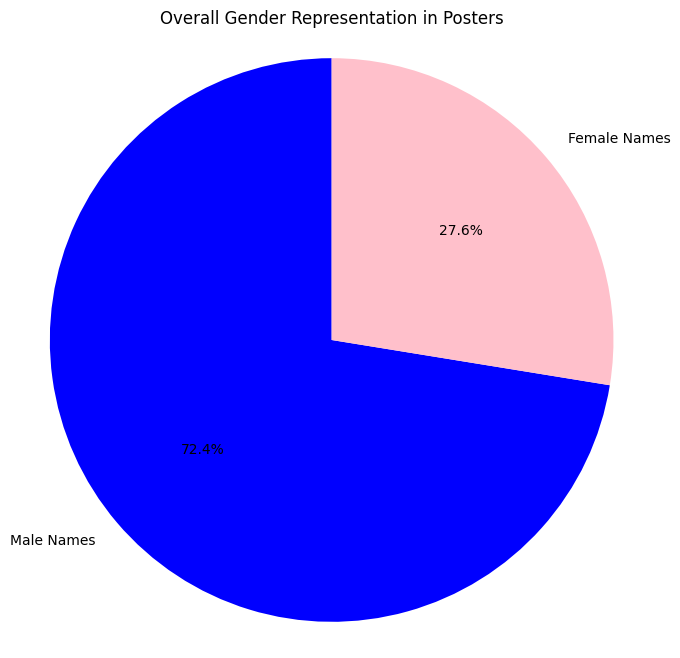

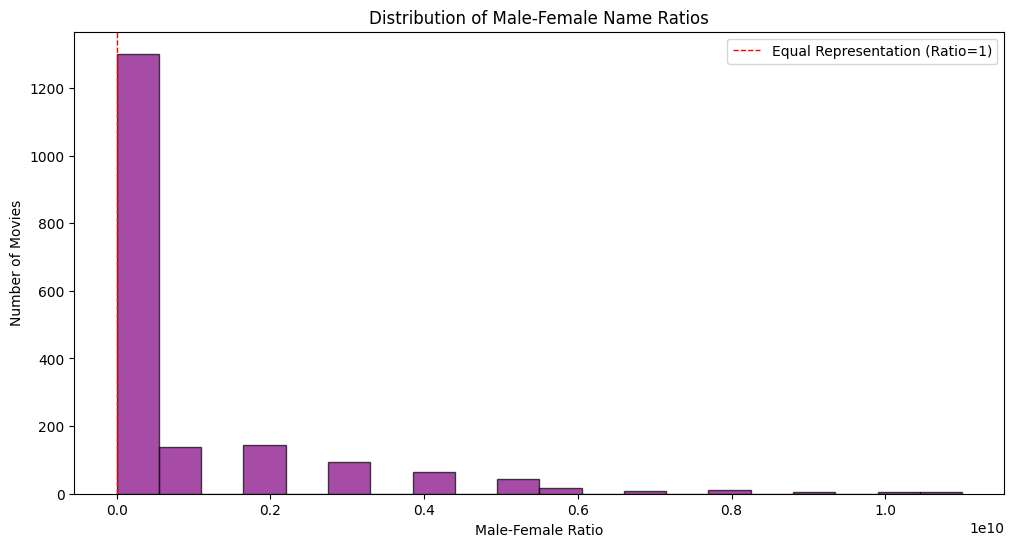

In [6]:
# Visualize proportion of male vs. female names in posters
labels = ['Male Names', 'Female Names']
sizes = [total_male_names, total_female_names]
colors = ['blue', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Overall Gender Representation in Posters")
plt.axis('equal')
plt.savefig('gender_repr.png')
plt.show()

# Histogram of Male-Female Ratios
plt.figure(figsize=(12, 6))
plt.hist(data['Male-Female Ratio'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title("Distribution of Male-Female Name Ratios")
plt.xlabel("Male-Female Ratio")
plt.ylabel("Number of Movies")
plt.axvline(1, color='red', linestyle='dashed', linewidth=1, label="Equal Representation (Ratio=1)")
plt.legend()
plt.savefig('male-female-ratio.png')
plt.show()

In [7]:
male_dominated_ratio = len(male_dominated) / len(data) * 100
female_dominated_ratio = len(female_dominated) / len(data) * 100

print(f"\nPercentage of movies with no female names: {male_dominated_ratio:.2f}%")
print(f"Percentage of movies with no male names: {female_dominated_ratio:.2f}%")


Percentage of movies with no female names: 32.46%
Percentage of movies with no male names: 9.06%
